# This is a project to determine the price of the properties based on various features. The dataset contains a list of uk property prices starting from 1995 to 2023. Its a large dataset. We have tried 3 to 4 to different models

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
pd.option_context('mode.use_inf_as_na', True)


In [163]:
# Load the dataset
sample_df = pd.read_csv('price_paid_records.csv',chunksize=10000)

# Display the first few rows of the datasetb


In [164]:
count=0;
final_df = pd.DataFrame()
for chunki in sample_df:
    result = chunki.sample(frac=0.008)
    lenresult = len(result)
    count= count+ lenresult
    final_df = pd.concat([final_df,result],ignore_index=True)
print(count)

179915


In [165]:
len(final_df)

179915

In [166]:
df= final_df

In [167]:
print(df.info())  # Check for missing values and data types
print(df.describe())  # Get basic statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179915 entries, 0 to 179914
Data columns (total 11 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Transaction unique identifier      179915 non-null  object
 1   Price                              179915 non-null  int64 
 2   Date of Transfer                   179915 non-null  object
 3   Property Type                      179915 non-null  object
 4   Old/New                            179915 non-null  object
 5   Duration                           179915 non-null  object
 6   Town/City                          179915 non-null  object
 7   District                           179915 non-null  object
 8   County                             179915 non-null  object
 9   PPDCategory Type                   179915 non-null  object
 10  Record Status - monthly file only  179915 non-null  object
dtypes: int64(1), object(10)
memory usage: 15.1+ MB
None


C:\softwares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


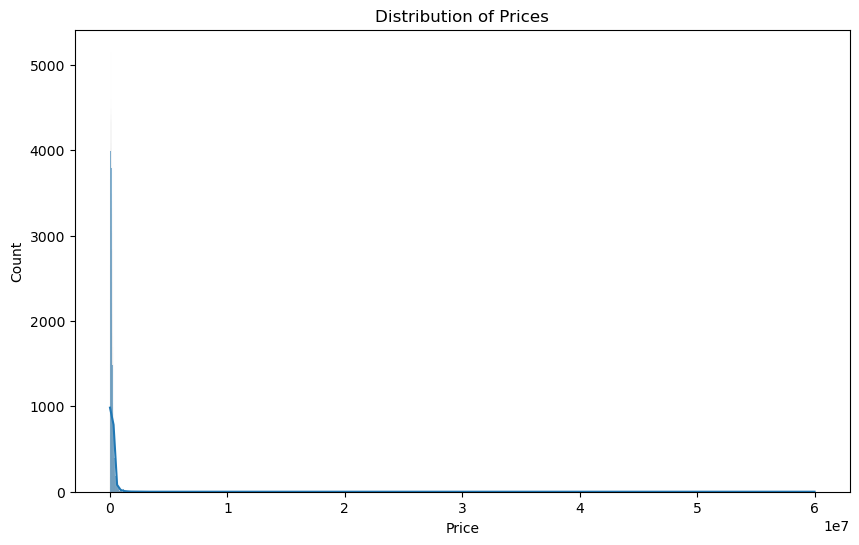

C:\softwares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


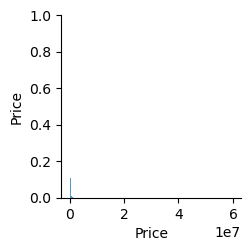

In [168]:
# Visualize the distribution of price (target variable)
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Prices')
plt.show()

# Pairplot for a deeper look at relationships (only for numeric columns)
sns.pairplot(df)
plt.show()

In [169]:
# Handle missing values (fill with median for numerical features)
df['Price'] = df['Price'].fillna(df['Price'].median())
df['Date of Transfer'] = pd.to_datetime(df['Date of Transfer'])
df['Year'] = df['Date of Transfer'].dt.year
df['Month'] = df['Date of Transfer'].dt.month
df['Day'] = df['Date of Transfer'].dt.day
# Define the bnumerical columns (these are the ones we want to scale)
numerical_cols = ['Year', 'Month', 'Day']  
df = df.drop('Date of Transfer', axis=1)
# Drop 'Transaction unique identifier' as it's not useful for prediction
df = df.drop('Transaction unique identifier', axis=1)
# Example: One-hot encode categorical variables
df = pd.get_dummies(df, columns=['Property Type', 'Old/New', 'Town/City', 'District', 'Duration','County', 'Record Status - monthly file only','PPDCategory Type'], drop_first=True)

# Scale numeric columns (if necessary)

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [170]:
# Features (X) and target (y)

X = df.drop('Price', axis=1)  # Drop the target variable from the feature set
y = df['Price']

In [171]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [174]:
df.head(30)

,Price,Year,Month,Day,Property Type_F,Property Type_O,Property Type_S,Property Type_T,Old/New_Y,Town/City_ABERAERON,...,County_WEST SUSSEX,County_WEST YORKSHIRE,County_WILTSHIRE,County_WINDSOR AND MAIDENHEAD,County_WOKINGHAM,County_WORCESTERSHIRE,County_WREKIN,County_WREXHAM,County_YORK,PPDCategory Type_B
0,65000,-1.607622,0.065589,-1.110580,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,44500,-1.607622,0.663606,-1.000017,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,54000,-1.607622,-1.728464,-1.221143,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,18000,-1.607622,0.962615,1.100681,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,40000,-1.607622,-1.728464,-1.221143,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
5,39950,-1.607622,1.560632,-1.000017,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
6,163000,-1.607622,-1.728464,0.326740,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,25500,-1.607622,1.560632,-1.773958,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
8,55000,-1.607622,1.560632,-0.447202,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,50000,-1.607622,0.663606,-1.000017,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [159]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")

RMSE: 146358.29518101094
MAE: 62676.808789703486
R2 Score: 0.4561070874012736


In [177]:
# Initialize the model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Predict prices
y_pred_prices = linear_model.predict(X_test)



In [178]:
linear_mse = mean_squared_error(y_test, y_pred_prices)
linear_rmse = mse ** 0.5
linear_mae = mean_absolute_error(y_test, y_pred_prices)
linear_r2 = r2_score(y_test, y_pred_prices)
print(f"RMSE: {linear_rmse}")
print(f"MAE: {linear_mae}")
print(f"R2 Score: {linear_r2}")

RMSE: 146358.29518101094
MAE: 106985076291.95526
R2 Score: -1768048273533914.8


In [179]:
# Initialize the model
log_model = LogisticRegression()

# Train the model
log_model.fit(X_train, y_train)

# Predict prices
log_y_pred = log_model.predict(X_test)

KeyboardInterrupt: 

In [126]:
log_mse = mean_squared_error(y_test, log_y_pred)
log_rmse = mse ** 0.5
log_mae = mean_absolute_error(y_test, log_y_pred)
log_r2 = r2_score(y_test, log_y_pred)
print(f"RMSE: {log_rmse}")
print(f"MAE: {log_mae}")
print(f"R2 Score: {log_r2}")

RMSE: 147922.2288467367
MAE: 78825.12716763005
R2 Score: 0.19068798614841642


In [184]:
# Initialize the XGBoost regressor
xg_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=8)
# Train the XGBoost model on the selected features
xg_model.fit(X_train, y_train)
# Make predictions
xgb_y_pred = xg_model.predict(X_test)

In [185]:
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_rmse = mse ** 0.5
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
print(f"RMSE: {xgb_rmse}")
print(f"MAE: {xgb_mae}")
print(f"R2 Score: {xgb_r2}")

RMSE: 146358.29518101094
MAE: 64444.66094921767
R2 Score: 0.23838170972852235


print(data_encoded)


# 